In [ ]:
import pandas as pd
import numpy as np

from tqdm import tqdm

import warnings
warnings.filterwarnings('ignore')

In [ ]:
data = pd.read_csv('data/annual_stock.csv')
data

In [ ]:
# query null values
data.isnull().sum().values


In [ ]:
# Step 1: Handling missing values

# Check the percentage of missing values in each column
missing_values = data.isnull().mean() * 100

# Removing columns with a high percentage of missing values (e.g., more than 50% missing)
threshold = 50  # percentage
columns_to_drop = missing_values[missing_values > threshold].index
data_cleaned = data.drop(columns=columns_to_drop)

# For the remaining columns, if they are numeric, fill missing values with the median, 
# and if they are categorical, fill with the mode
for col in data_cleaned.columns:
    if data_cleaned[col].dtype == 'object':
        # fill with the most frequent value (mode)
        data_cleaned[col] = data_cleaned[col].fillna(data_cleaned[col].mode()[0])
    else:
        # fill with median
        data_cleaned[col] = data_cleaned[col].fillna(data_cleaned[col].median())

# Display the updated DataFrame
data_cleaned.head()


In [ ]:
import numpy as np

# Step 2: Handling outliers

# For each numeric column, replace outliers (values outside the 1st and 99th percentiles) with the median
for col in data_cleaned.select_dtypes(include=np.number).columns:
    lower_bound = data_cleaned[col].quantile(0.01)
    upper_bound = data_cleaned[col].quantile(0.99)
    median = data_cleaned[col].median()
    data_cleaned[col] = np.where(data_cleaned[col] < lower_bound, median, data_cleaned[col])
    data_cleaned[col] = np.where(data_cleaned[col] > upper_bound, median, data_cleaned[col])

# Display the updated DataFrame
data_cleaned.head()


In [ ]:
# Descriptive Statistics Analysis
descriptive_stats = data_cleaned.describe()

descriptive_stats


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Selecting a few numerical columns for visualization
# Assuming the first few numeric columns are of interest
selected_columns = data_cleaned.select_dtypes(include=np.number).columns[:5]
data_for_visualization = data_cleaned[selected_columns]

# Plotting histograms and boxplots for the selected columns
plt.figure(figsize=(15, 10))

for i, col in enumerate(data_for_visualization.columns):
    # Histogram
    plt.subplot(2, len(selected_columns), i+1)
    sns.histplot(data_cleaned[col], kde=True)
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

    # Boxplot
    plt.subplot(2, len(selected_columns), len(selected_columns) + i+1)
    sns.boxplot(y=data_cleaned[col])
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)

plt.tight_layout()
plt.show()


In [ ]:
# Selected columns based on financial and economic importance
selected_factors = [
    "Total fixed assets", 
    "Interest -free liability",
    "Interest debt",
    "Net debt",
    "Operating capital",
    "Operating income",
    "Net profit",
    # Assuming there are columns for cash flow and return on total assets
    # If not, these lines should be commented out or replaced
    # "Cash flow",
    # "Return on total assets",
    "Equity"
]

# Finding the closest matching column names in the dataset
matched_columns = []
for factor in selected_factors:
    matched_columns.extend([col for col in data_cleaned.columns if factor.lower() in col.lower()])

# Subset the data for visualization and analysis
data_selected_factors = data_cleaned[matched_columns]

# Display the selected columns for confirmation
data_selected_factors.head()


In [31]:
# Checking if the selected columns are present in the dataset
selected_factors = [
    "Total fixed assets", 
    "Interest-free liability", 
    "Interest debt", 
    "Net debt",
    "Operating capital",
    "Business income",
    "Net profit",
    "Cash and cash equivalent net increase",
    "Debt ratio",
    "Asset-liability ratio"
]

# Checking the presence of these columns in the cleaned dataset
available_factors = [factor for factor in selected_factors if factor in data_cleaned.columns]
missing_factors = [factor for factor in selected_factors if factor not in data_cleaned.columns]

available_factors, missing_factors


(['Total fixed assets',
  'Interest debt',
  'Net debt',
  'Operating capital',
  'Cash and cash equivalent net increase'],
 ['Interest-free liability',
  'Business income',
  'Net profit',
  'Debt ratio',
  'Asset-liability ratio'])

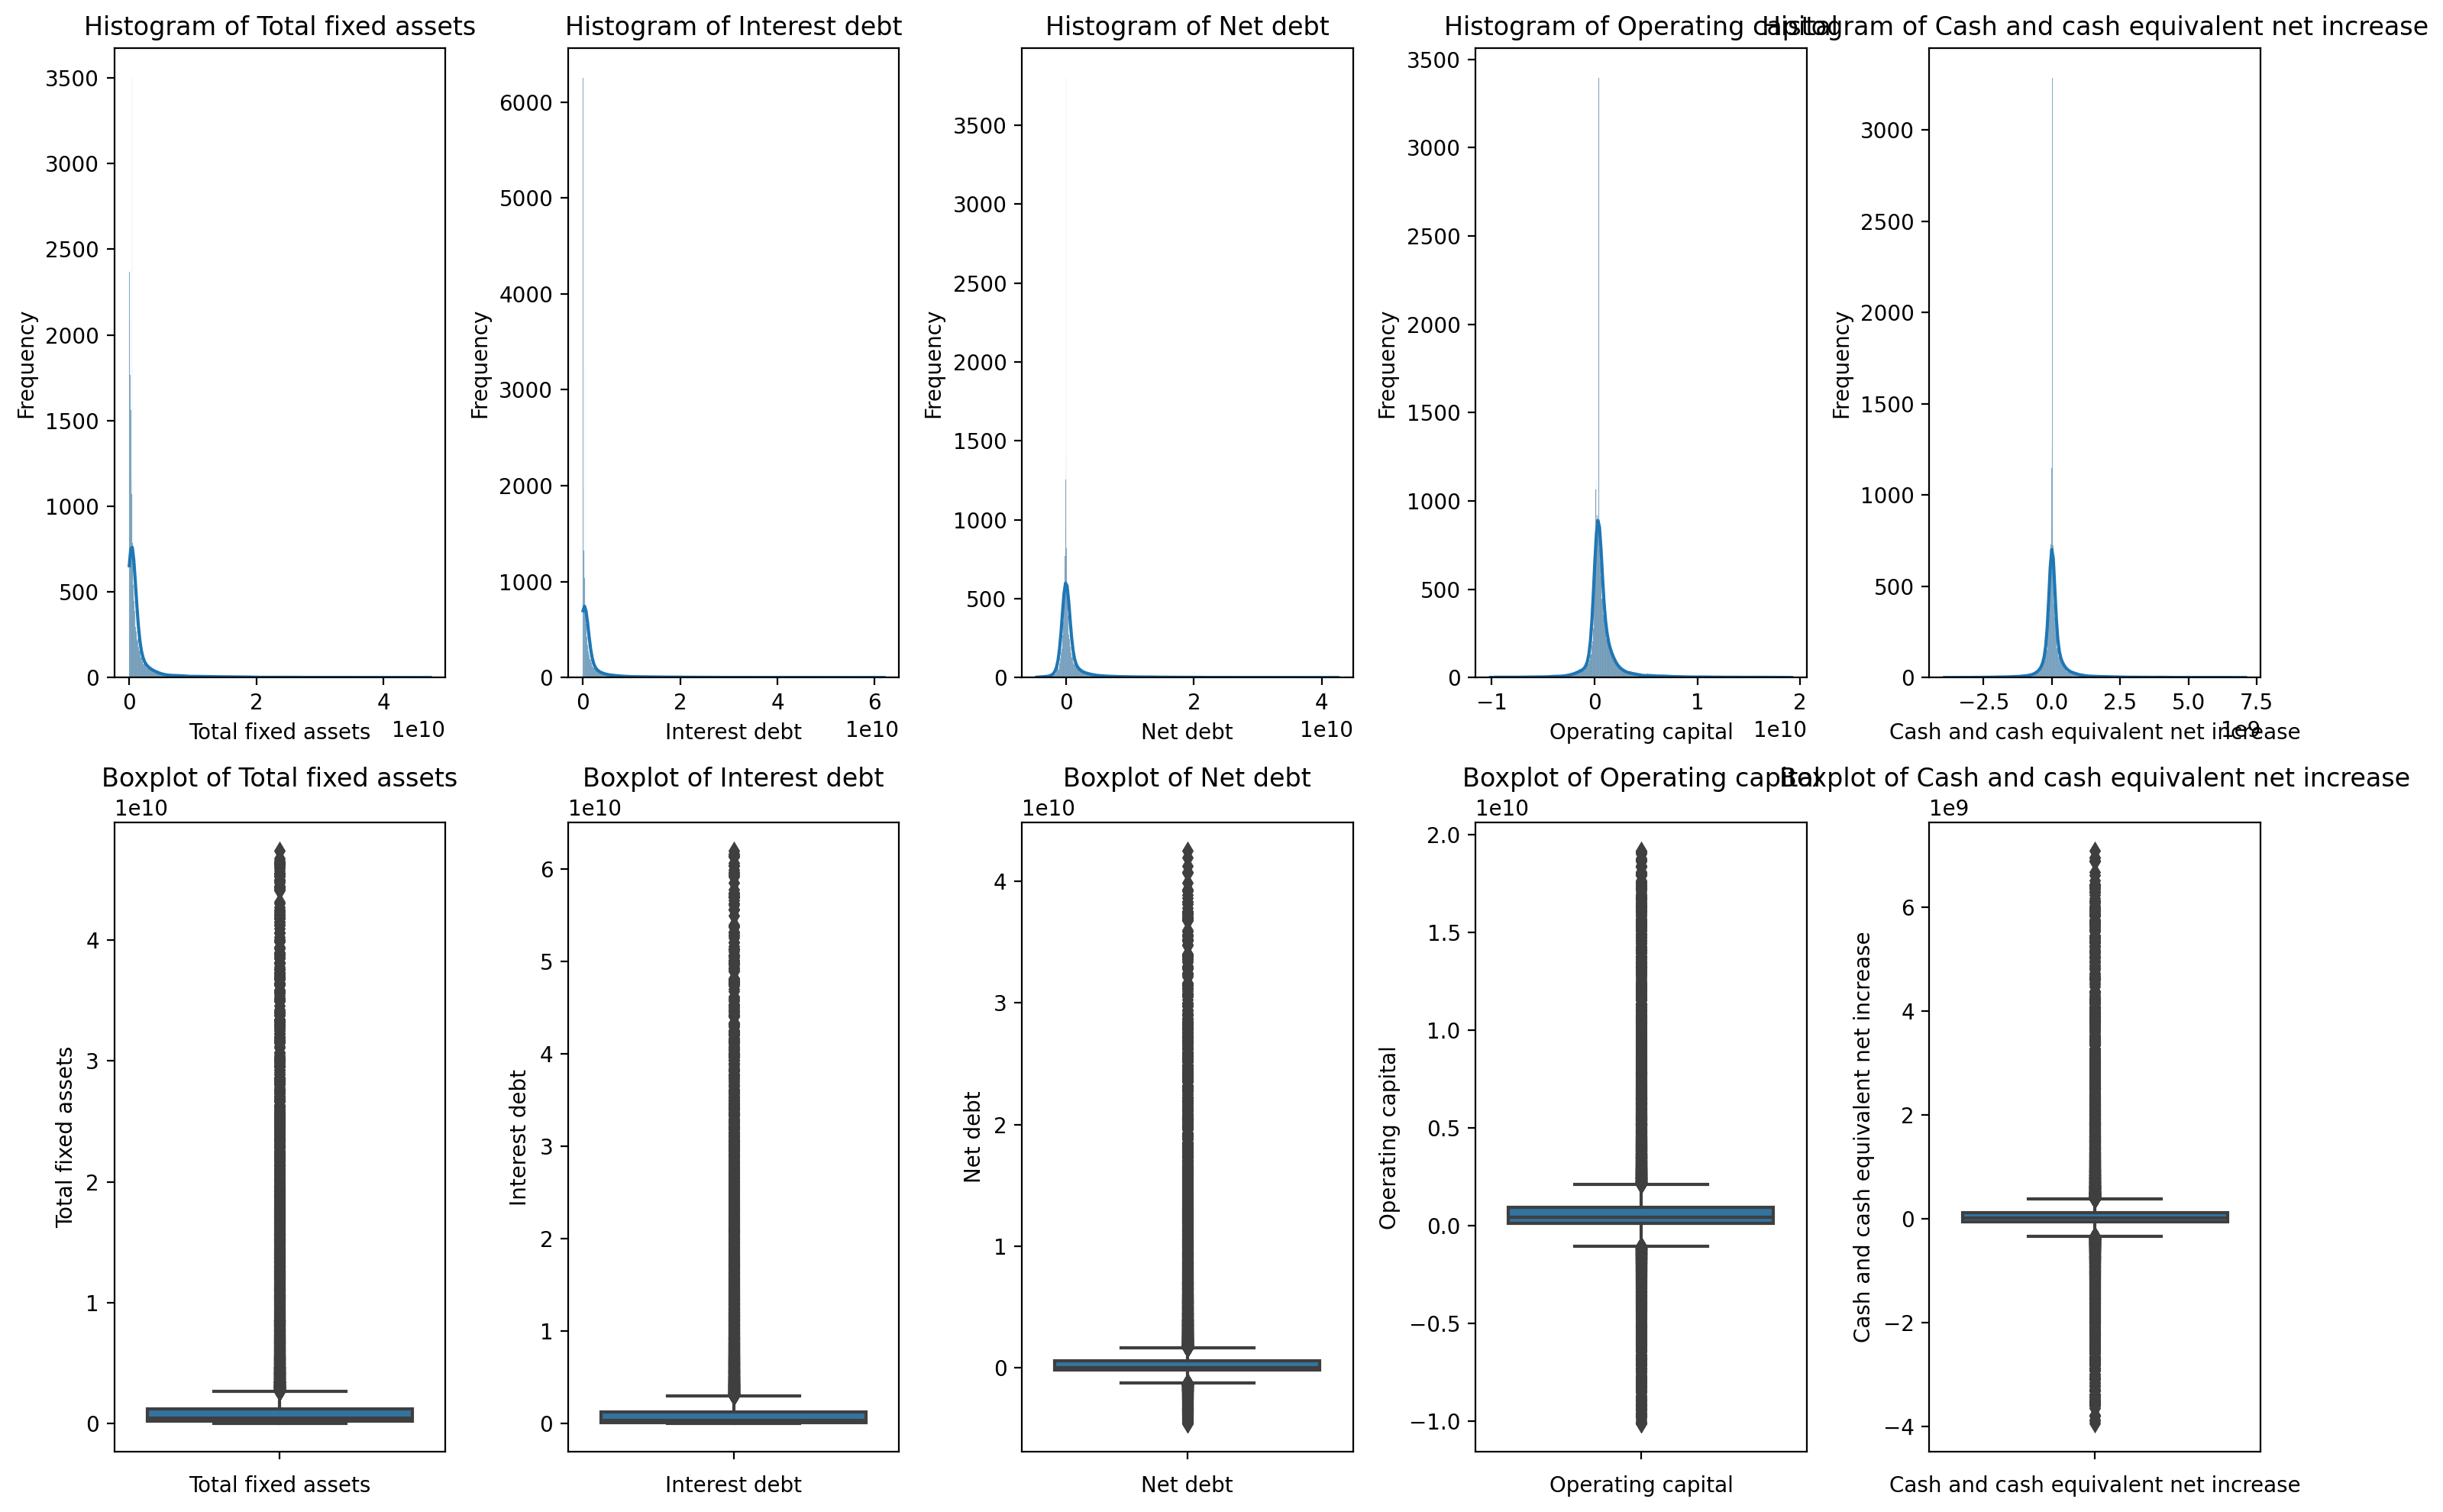

In [33]:
# Plotting histograms and boxplots for the available factors
selected_data = data_cleaned[available_factors]

# Plotting
plt.figure(figsize=(15, 10), dpi=200)

for i, col in enumerate(selected_data.columns):
    # Histogram
    plt.subplot(2, len(selected_data.columns), i+1)
    sns.histplot(selected_data[col], kde=True)
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

    # Boxplot
    plt.subplot(2, len(selected_data.columns), len(selected_data.columns) + i+1)
    sns.boxplot(y=selected_data[col])
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)

plt.tight_layout()
plt.show()
